***
<br><br><br><br><br>
<h1>Anomaly Detection and Treatment: Outliers</h1>
<em>DAT-5301 In-Class Script</em><br><br>

Written by Chase Kusterer - Faculty of Analytics <br>
Hult International Business School <br>
<a href="https://github.com/chase-kusterer">https://github.com/chase-kusterer</a> <br><br><br><br><br>
***
***
***

## Introduction: Outliers and Analytical Philosophy

<a href="https://www.merriam-webster.com/dictionary/outlier">Merriam Webster</a> defines an <a href="https://www.merriam-webster.com/dictionary/outlier">outlier</a> as <em>"a statistical observation that is markedly different in value from the others of the sample."</em> A common statistical heuristic is to define <em>"markedly different"</em> as more than the result of:
<br><br>

~~~
1.5 x INTERQUARTILE RANGE
~~~

<br>
Throughout every analysis in my time as a member of the data science community, I have questioned the computation and value of outliers, as well as whether or not I would ever encounter a situation were it would be beneficial to quickly apply the aforementioned rule of thumb and move on to other aspects of an analysis. At the same time, I have seen and worked alongside data science professionals that commonly apply this heuristic, even going as far as to hastily delete or impute outliers without taking a moment to understand them. When I see this, I can't help but think that at some point <strong>these analysts started taking the math too literally and forgot the business problem they were trying to solve.</strong> In business analytics, actionable insights are king, and in nearly every analysis I have taken part in, outliers have generated value in areas such as domain knowledge (understanding what is feasible), insights generation (information-driven findings), and prediction (yes, I said prediction). This notebook not only focuses on techniques for outliers, but also serves as an introduction to approaching an analysis as more of an art than a science. This is a critical skill that every business analyst <strong>must</strong> develop. 
<br><br>
<strong>Note:</strong> As you move through this code, try to notice how much has been recycled from the missing value imputation notebook. This is one of the many benefits of taking a programmatic approach to data science.
<br><br>

## Part 1: Quantitative Outlier Detection

#### S14.1.1) Import <em>pandas</em> as <em>pd</em>, <em>matplotlib.pyplot</em> as <em>plt</em>, and <em>seaborn</em> as <em>sns</em>. Then, read in the file <em>diamonds_imputed.xlsx</em> as <em>diamonds</em>.

In [4]:
## Session 14.1.1 ##

# importing packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## New! ##
# dictionary for data types
types = {'Obs'       : str,
         'carat'     : float,
         'color'     : int,
         'clarity'   : int,
         'cut'       : int,
         'channel'   : 'category',
         'store'     : 'category',
         'price'     : int,
         'm_carat'   : int,
         'm_color'   : int,
         'm_clarity' : int,
         'm_cut'     : int}

## Data Clean up
# adjusting clarity to fit the rest of the data (was 2-10, now 1-9)
diamonds['new_clarity'] = diamonds['clarity'] - 1 (Dont run more than once.)

# reading in dataset
file     = 'diamonds_imputed.xlsx'
diamonds = pd.read_excel(file, dtype = types)


# checking data types
diamonds.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 13 columns):
Unnamed: 0    409 non-null int64
Obs           409 non-null object
carat         409 non-null float64
color         409 non-null int32
clarity       409 non-null int32
cut           409 non-null int32
channel       409 non-null category
store         409 non-null category
price         409 non-null int32
m_carat       409 non-null int32
m_color       409 non-null int32
m_clarity     409 non-null int32
m_cut         409 non-null int32
dtypes: category(2), float64(1), int32(8), int64(1), object(1)
memory usage: 23.8+ KB


***

<br>

This section shall cover two useful <em>pandas DataFrame</em> methods for outlier detection: <em>describe( )</em> and <em>quantile( )</em>.
<br>
#### S14.1.2) Call <em>describe</em> on the <em>diamonds</em> dataset, rounding results to two decimal places.

In [7]:
## Session 14.1.2 ##


# calling describe() to analyze distributions 
diamonds.describe().round(2)



,Unnamed: 0,carat,color,clarity,cut,price,m_carat,m_color,m_clarity,m_cut,new_clarity
count,409.00,409.00,409.00,409.00,409.00,409.00,409.00,409.00,409.00,409.00,409.00
mean,204.00,1.05,4.23,6.06,0.37,6488.23,0.02,0.03,0.02,0.02,5.06
std,118.21,0.42,1.79,1.56,0.48,4414.43,0.15,0.18,0.13,0.15,1.56
min,0.00,0.32,1.00,2.00,0.00,878.00,0.00,0.00,0.00,0.00,1.00
25%,102.00,0.72,3.00,5.00,0.00,3490.00,0.00,0.00,0.00,0.00,4.00
50%,204.00,1.02,4.00,6.00,0.00,5550.00,0.00,0.00,0.00,0.00,5.00
75%,306.00,1.21,6.00,7.00,1.00,8089.00,0.00,0.00,0.00,0.00,6.00
max,408.00,2.48,9.00,10.00,1.00,27575.00,1.00,1.00,1.00,1.00,9.00


***

<br>

#### S14.1.3) Apply <em>quantile( )</em> on <em>carat</em>, <em>color</em>, <em>clarity</em>, <em>cut</em>, and <em>price</em>.

In [8]:
## Session 14.1.3 ##

# applying quantile on features of interest
diamonds[['carat',
          'color',
          'clarity',
          'cut',
          'price']].quantile([0.20,
                              0.40,
                              0.60,
                              0.80,
                              1.00])

# see Footnote 1 for an explanation of the code above

,carat,color,clarity,cut,price
0.2,0.700,2.0,5.0,0.0,3178.8
0.4,1.010,4.0,6.0,0.0,4852.0
0.6,1.050,5.0,6.0,0.0,6200.8
0.8,1.314,6.0,7.0,1.0,8732.0
1.0,2.480,9.0,10.0,1.0,27575.0


<strong> Notes: </strong>
    * Top 2 % of diamonds are really big (not aligned with trend)
    * Top 2 % of diamonds are really expensive (not aligned with trend)

***

<br>

## Part 2: Visual Outlier Detection
The boxplot is one of the most useful visual tools for detecting outliers. We can call <em>help( )</em> on <em>pd.DataFrame.boxplot</em> to learn more.
<br><br>
#### S14.2.1) Develop a boxplot for <em>carat</em>.

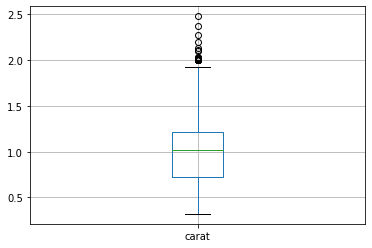

In [9]:
## Session 14.2.1 ##

# a basic boxplot
diamonds.boxplot(column = 'carat')

# displaying the plot
plt.show()


***

<br>

#### S14.2.2) Segment the <em>carat</em> boxplot by <em>channel</em>.

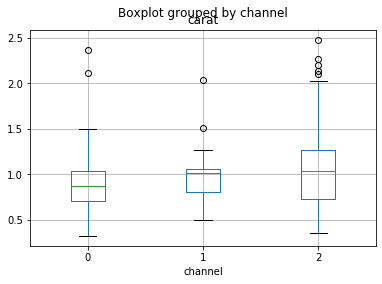

In [11]:
## Session 14.2.2 ##

# a boxplot that's segmented
diamonds.boxplot(column = ['carat'],
                 by     = 'channel')


# displaying the plot
plt.show()


***

<br><br>
Applying more optional arguments.

C:\Users\William W. Johnsen\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:264: MatplotlibDeprecationWarning: The 'manage_xticks' parameter of boxplot() has been renamed 'manage_ticks' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  bp = ax.boxplot(values, **kwds)


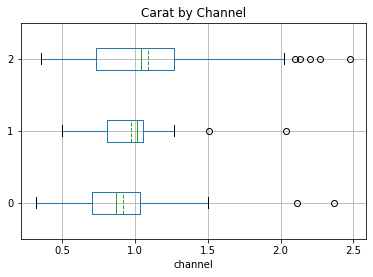

In [12]:
## Session 14.2.3 ##

# a more detailed boxplot that's segmented
diamonds.boxplot(column        = ['carat'],
                 by            = 'channel',
                 vert          = False,
                 manage_xticks = True, # deprecated!
                 patch_artist  = False,
                 meanline      = True,
                 showmeans     = True)


# adding some stuff
plt.title("Carat by Channel")
plt.suptitle("")

# displaying the plot
plt.show()

# see Footnote 2 for an explanation of the code above


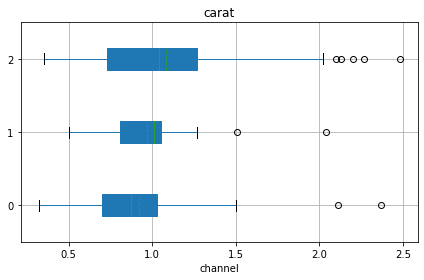

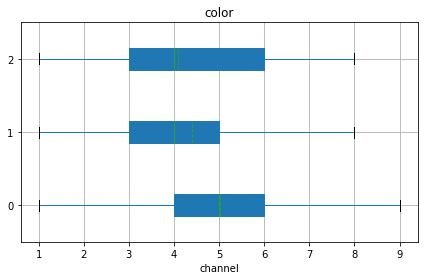

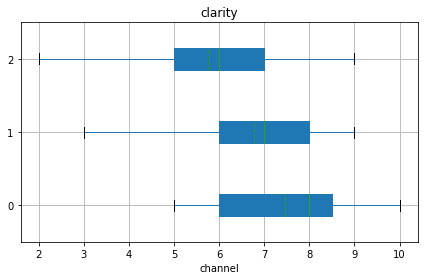

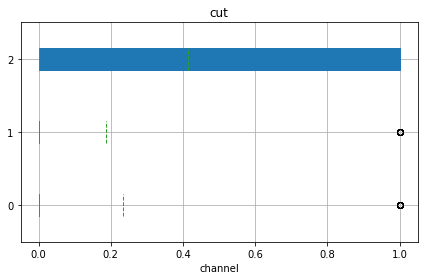

In [13]:
## Session 14.2.4 ##

# ...and a more advanced set of boxplots

# carat
diamonds.boxplot(column = ['carat'],
                 by = 'channel',
                 vert = False,
                 patch_artist = True,
                 meanline = True,
                 showmeans = True)



plt.suptitle('')
plt.tight_layout()
plt.show()


# color
diamonds.boxplot(column = ['color'],
                 by = 'channel',
                 vert = False,
                 patch_artist = True,
                 meanline = True,
                 showmeans = True)


plt.suptitle('')
plt.tight_layout()
plt.show()



# clarity
diamonds.boxplot(column = ['clarity'],
                 by = 'channel',
                 vert = False,
                 patch_artist = True,
                 meanline = True,
                 showmeans = True)

plt.suptitle('')
plt.tight_layout()
plt.show()



# cut
diamonds.boxplot(column = ['cut'],
                 by = 'channel',
                 vert = False,
                 patch_artist = True,
                 meanline = True,
                 showmeans = True)

plt.suptitle('')
plt.tight_layout()
plt.show()


***

<br><br>
The boxplots for <em>carat</em>, <em>color</em>, <em>clarity</em>, and <em>cut</em> can be combined into one visual. However, this may make it more challenging to determine outlier thresholds for each feature.
<br><br>

#### S14.2.5) Develop one visual that contains boxplots for <em>carat</em>, <em>color</em>, <em>clarity</em> and <em>cut</em>.

In [ ]:
## Session 14.2.5 ##

# carat, color, clarity, and cut
diamonds.boxplot(column = ____,
                 vert = False,
                 ____ = True, # replacing manage_xticks
                 patch_artist = False,
                 meanline = True,
                 showmeans = True, # notice the comma!
                 )


# adding a title
plt.____("Boxplots for Carat, Color, Clarity, and Cut")

# displaying the plot
____


***

<br>

#### S14.2.6) Develop a boxplot for <em>price</em> where a line representing the arithmetic mean displayed is and the plot is oriented horizontally.

In [ ]:
## Session 14.2.6 ##

# price
plt.boxplot(x            = ____,
            data         = ____,
            vert         = ____,
            patch_artist = ____,
            meanline     = ____,
            showmeans    = ____)


# labeling the axis
plt.xlabel(____)

# displaying the plot
____


***

<br>

## Part 3: Enhancing Visualizations
To appreciate how data visualization in Python has evolved over time, let's take a look at histograms coming from <em>pandas</em>, <em>matplotlib.pyplot</em>, and <em>seaborn</em>.

In [ ]:
## Session 14.3.1 ##

# histogram in pandas
diamonds['price'].hist()

# labels and display
plt.title("pandas")
plt.xlabel("Price")
plt.show()


########################################


# histogram in matplotlib.pyplot
plt.hist(x = 'price',
         data = diamonds)

# labels and display
plt.title("matplotlib.pyplot")
plt.xlabel("Price")
plt.show()


########################################


# histogram (distplot) in seaborn
sns.distplot(diamonds['price'])

# labels and display
plt.title("seaborn")
plt.xlabel("Price")
plt.show()


***

<br>

Now let's apply the enhanced graphical capabilities of <em>seaborn</em> to features in the <em>diamonds</em> dataset.

In [ ]:
## Session 14.3.2 ##

# Customizing with sns.distplot
plt.subplot(2, 2, 1)
sns.distplot(diamonds['price'],
             bins = 'fd',
             color = 'g')


# labeling axis
plt.xlabel('Price')


########################################


plt.subplot(2, 2, 2)
sns.distplot(diamonds['carat'],
             bins = 'fd',
             color = 'y')


# labeling axis
plt.xlabel('Carat')


########################################


plt.subplot(2, 2, 3)
sns.distplot(diamonds['color'],
             bins = 17,
             kde = False,
             rug = True,
             color = 'orange')


# labeling axis
plt.xlabel('Color')


########################################


plt.subplot(2, 2, 4)

sns.distplot(diamonds['clarity'],
             bins = 17,
             kde = False,
             rug = True,
             color = 'r')


# labeling axis
plt.xlabel('Clarity')


# formatting and display
plt.tight_layout()
plt.savefig('Diamond Data Histograms 2 of 3.png')
plt.show()


########################################


plt.subplot(2, 2, 1)
sns.distplot(diamonds['cut'],
             kde = False,
             rug = True,
             color = 'navy')


# labeling axis
plt.xlabel('Cut')


########################################


plt.subplot(2, 2, 2)
sns.distplot(diamonds['store'],
             bins = 25,
             kde = False,
             color = 'maroon')


# labeling axis
plt.xlabel('Store')


########################################


plt.subplot(2, 2, 3)
sns.distplot(diamonds['channel'],
             bins = 8,
             kde = False,
             color = 'gold')


# labeling axis
plt.xlabel('Channel')


# formatting and display
plt.tight_layout()
plt.savefig('Diamond Data Histograms 2 of 3.png')
plt.show()


***

<br>

Finally, let's develop outlier thresholds within each plot with soft coding. This will help make the code easier to maintain, allowing us to quickly adjust thresholds if needed.
<br><br>

#### S14.3.3) Based on the visuals generated thus far, develop outlier thresholds for each feature.

In [ ]:
## Session 14.3.3 ##

# creating outlier thresholds
____


***

<br><br>

#### S14.3.4) Add the outlier threshold for <em>price</em> to its histogram using <em>plt.axvline</em>.

In [ ]:
## Session 14.3.4 ##

# sns.distplot
plt.subplot(2, 2, 1)
sns.distplot(diamonds['price'],
             bins = 35,
             color = 'g')


# labeling axis
plt.xlabel('Price')


# outlier thresholds
____


# see Footnote 4 for an explanation of the code above


***

<br><br>

#### S14.3.5) Add the outlier thresholds to the histograms of each feature.

In [ ]:
## Session 14.3.5 ##

# sns.distplot
plt.subplot(2, 2, 1)
sns.distplot(diamonds['price'],
             bins = 35,
             color = 'g')


# labeling axis
plt.xlabel('Price')


# outlier thresholds
plt.axvline(x = price_limit_hi,
            label = 'Outlier Thresholds',
            linestyle = '--')


# see Footnote 4 for an explanation of the code above


########################################

# carat
plt.subplot(2, 2, 2)
____


########################################

# color
plt.subplot(2, 2, 3)
____


########################################

# clarity
plt.subplot(2, 2, 4)
____



# formatting, saving, and display
plt.tight_layout()
plt.savefig('Diamond Data Histograms 3 of 3.png')
plt.show()


***

<br>

## Part 4: Developing Features for Outlier Flags
As with missing values, it can be valuable to flag outliers.
<br><br>

#### S14.4.1) Adjust your previous outlier threshold objects in the space below.

In [ ]:
## Session 14.4.1 ##

# adjusting outlier thresholds
____


In [ ]:
## Session 14.4.1 ##

diamonds = pd.read_excel(file)


########################
# price
########################

# writing an outlier flag
diamonds['out_price'] = 0


# filling in outlier flag
diamonds['out_price'].replace(to_replace = diamonds.loc[:, 'out_price']\
                              [diamonds['price'] > price_limit_hi],
                              value      = 1,
                              inplace    = True)


# checking results
print(diamonds['price'][diamonds['price'] > price_limit_hi].count())
print(diamonds['out_price'].abs().sum())


In [ ]:
## Session 14.4.2 ##

########################
# carat
########################

# writing an outlier flag
diamonds['out_carat'] = 0


# filling in outlier flag
diamonds['out_carat'].replace(to_replace = diamonds.loc[:, 'out_carat']\
                              [diamonds['carat'] > carat_limit_0]\
                              [diamonds['channel'] == 0],
                              value      = 1,
                              inplace    = True)


diamonds['out_carat'].replace(to_replace = diamonds.loc[:, 'out_carat']\
                              [diamonds['carat'] > carat_limit_1]\
                              [diamonds['channel'] == 1],
                              value      = 1,
                              inplace    = True)


diamonds['out_carat'].replace(to_replace = diamonds.loc[:, 'out_carat']\
                              [diamonds['carat'] > carat_limit_2]\
                              [diamonds['channel'] == 2],
                              value      = 1,
                              inplace    = True)   


# See Footnote 5 for an explanation of the code above

# checking results
print(diamonds['carat'][diamonds['carat'] > carat_limit_0]\
                       [diamonds['channel'] == 0].count() +
      diamonds['carat'][diamonds['carat'] > carat_limit_1]\
                       [diamonds['channel'] == 1].count() +
      diamonds['carat'][diamonds['carat'] > carat_limit_2]\
                       [diamonds['channel'] == 2].count())

print(diamonds['out_carat'].abs().sum())


In [ ]:
## Session 14.4.3 ##

########################
# color
########################

# writing an outlier flag
diamonds['out_color'] = 0


# filling in outlier flag
diamonds['out_color'].replace(to_replace = diamonds.loc[:, 'out_color']\
                     [diamonds['color'] > color_limit_hi],
                     value      = 1,
                     inplace    = True)



# checking results
print(diamonds['color'][diamonds['color'] > color_limit_hi].count())
print(diamonds['out_color'].abs().sum())


In [ ]:
## Session 14.4.4 ##

########################
# clarity
########################

# writing an outlier flag
diamonds['out_clarity'] = 0


# filling in outlier flag
diamonds['out_clarity'].replace(to_replace = diamonds.loc[:, 'out_clarity']\
                     [diamonds['clarity'] < clarity_limit_lo],
                     value      = -1,
                     inplace    = True)


diamonds['out_clarity'].replace(to_replace = diamonds.loc[:, 'out_clarity']\
                     [diamonds['clarity'] > clarity_limit_hi],
                     value      = 1,
                     inplace    = True)



# checking results
print(diamonds['clarity'][diamonds['clarity'] > clarity_limit_hi].count() +
      diamonds['clarity'][diamonds['clarity'] < clarity_limit_lo].count())

print(diamonds['out_clarity'].abs().sum())


In [ ]:
## Session 14.4.5 ##

########################
# cut
########################

# writing an outlier flag
diamonds['out_cut'] = 0


# filling in outlier flag
diamonds['out_cut'].replace(to_replace = diamonds.loc[:, 'out_cut']\
                     [diamonds['cut'] == 1],
                     value      = 1,
                     inplace    = True)


# checking results
print(diamonds['cut'][diamonds['cut'] == 1].sum())

print(diamonds['out_cut'].abs().sum())


In [ ]:
## Session 14.4.6 ##

# creating an outlier sum column 
diamonds['out_sum'] = (abs(diamonds['out_price'])   +
                       abs(diamonds['out_carat'])   +
                       abs(diamonds['out_clarity']) +
                       abs(diamonds['out_color'])   +
                       abs(diamonds['out_cut']))

# See Footnote 6 for an explanation of the code above



check = (diamonds.loc[ : , ['out_sum',
                            'out_price',
                            'out_carat',
                            'out_clarity',
                            'out_color',
                            'out_cut']].sort_values(['out_sum'],
                                        ascending = False))


# See Footnote 7 for an explanation of the code above

# displaying the results
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
display(check)


In [ ]:
## Session 14.4.7 ##

# saving check as an Excel file
check.to_excel('Outlier Checks.xlsx')

# saving diamonds as an Excel file
diamonds.to_excel('diamonds_flagged.xlsx', index = False)


***

~~~

   ___  _   _ _____                      
  / _ \| | | |_   _|                     
 | | | | | | | | |    _____              
 | |_| | |_| | | |   |_____|             
  \___/ \___/  |_|                       
      _                  _ _             
  ___| |_ __ _ _ __   __| (_)_ __   __ _ 
 / __| __/ _` | '_ \ / _` | | '_ \ / _` |
 \__ \ || (_| | | | | (_| | | | | | (_| |
 |___/\__\__,_|_| |_|\__,_|_|_| |_|\__, |
                                   |___/ 
~~~


***

~~~
###############################################################################
# Footnotes
###############################################################################


Footnote 0: the purpose of footnotes

to give a line-by-line explanation of a code snippet


*******************************************************************************


Footnote 1: calling quantiles

diamonds[                                      # calling the diamond dataset
['carat', 'color', 'clarity', 'cut', 'price']  # with columns in a list
].quantile(                                    # calling the quantile function
[0.20, 0.40, 0.60, 0.80, 1.00])                # with specific quantiles in a list


*******************************************************************************


Footnote 2: calling quantiles

diamonds.boxplot(                    # calling boxplot on the diamonds dataset
column = ['carat'],                  # specifying the carat column
by = 'channel',                      # separating the data by the channel column
vert = False,                        # setting vert = False to make horizontal boxplots
manage_xticks = True,                # setting manage_xticks = True to help format the plot
patch_artist = False,                # setting patch_artist = False to get transparent boxes
meanline = True,                     # setting meanline = True to get a line representing the mean
showmeans = True)                    # setting showmeans = True to show the mean and median lines


plt.title("Carat by Channel")        # creating a custom title
plt.suptitle("")                     # supressing the default title

plt.show()                           # displaying the plot


*******************************************************************************


Footnote 3: calling quantiles

plt.hist(                            # calling the histogram function from plt
x = 'price',                         # on the variable price
data = diamonds,                     # from the diamond dataset
bins = 'fd',                         # with the number of bins equal to the Freedman-Diaconis rule
cumulative = True,                   # setting cumulative = True to generate a cumulative distribution
histtype = 'step'                    # setting histtype = 'step' to get steps and a hallow histogram
)                                    # closing the histogram function


plt.xlabel("Price")                  # setting the x-axis label to "Price"
plt.show()                           # displaying the plot



*******************************************************************************


Footnote 4: working with distplot and custom lines

plt.subplot(2, 2,                    # setting a 2 x 2 plot window
1)                                   # and preparing to plot in window 1

sns.distplot(                        # calling distplot from sns
diamonds['price'],                   # on the variable price from the diamonds dataset
bins = 35,                           # specifiying 35 bins
color = 'g')                         # changing the color to green

plt.xlabel('Price')                  # setting the x-axis label to "Price"


plt.axvline(                         # calling a function to create a custom vertical line
x = price_limit_hi,                  # which is drawn at price_limit_hi
label = 'Outlier Thresholds',        # and labeled as 'Outlier Thresholds'
linestyle = '--')                    # and with a '--' line style


*******************************************************************************


Footnote 5: working with distplot and custom lines


diamonds['out_carat'] = 0                    # creating a new variable called out_carat


for val in enumerate(                        # starting a for loop where indexes are also called
diamonds.loc[ : , 'carat']):                 # on all rows of the column price in the diamonds dataset


if diamonds.loc[val[0], 'channel'] == 0      # specifying a condition that subsets observations where channel is equal to zero
and                                          # and also
val[1] > carat_limit_0:                      # that carat is greater than carat_limit_0
        
diamonds.loc[val[0], 'out_carat'] = 1        # and if BOTH of these conditions are true, set out_carat to 1


*******************************************************************************


Footnote 6: creating a new variable: out_sum 


diamonds['out_sum'] =                         # creating a new object called out_sum
(abs(diamonds['out_price'])  +                # by adding together the absolute value
abs(diamonds['out_carat'])   +                # of all 'out_' columns
abs(diamonds['out_clarity']) +
abs(diamonds['out_color'])   +
abs(diamonds['out_cut']))


*******************************************************************************


Footnote 7: checking the content of the outlier flags


check =                                       # creating a variable called check
(diamonds.loc[ : ,                            # from the diamond dataset
['out_sum',                                   # taking all outlier flags including out_sum
'out_price',
'out_carat',
'out_clarity',
'out_color',
'out_cut']
].sort_values(['out_sum'],                    # that is sorted based on out_sum
ascending = False))                           # where the highest value of out_sum is on top

    
*******************************************************************************
~~~